In [12]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
import geopandas as gpd
import contextily as ctx
from PIL import Image, ImageDraw, ImageFont, ImageFilter
import os

# --- INITIAL PLOT SETUP ---

fig, ax = plt.subplots(figsize=(9, 11.25), dpi=300)

# ROUTE
gdf_3857.plot(ax=ax, linewidth=3.5, color='cyan', path_effects=[
    pe.withStroke(linewidth=6, foreground='black')
])

# BASEMAP
ctx.add_basemap(ax, source=ctx.providers.Esri.WorldImagery, zoom=14)

# STYLES
label_style = dict(fontsize=12, color='white',
                   path_effects=[pe.withStroke(linewidth=3, foreground='black')])

journal_style = dict(fontsize=10, color='white',
                     bbox=dict(boxstyle="round,pad=0.4", facecolor="black", alpha=0.5, edgecolor='white'),
                     path_effects=[pe.withStroke(linewidth=1.5, foreground='black')])

# WAYPOINTS
def label_with_shadow(x, y, emoji, label):
    ax.text(x+50, y-50, emoji, fontsize=16, color='black', alpha=0.4)
    ax.text(x, y, f"{emoji} {label}", **label_style)

label_with_shadow(start_x, start_y, "🏁", "Start")
label_with_shadow(mid_x, mid_y, "⛺", "Camp 1")
label_with_shadow(end_x, end_y, "🎯", "End")

# JOURNAL ENTRIES (positioned cleaner)
ax.text(start_x + 500, start_y - 500, "\n".join([
    "Day 1: Descent begins.",
    "The silence was deafening.",
    "We stepped into stillness,",
    "where even time felt old."
]), **journal_style)

ax.text(mid_x + 500, mid_y + 500, "\n".join([
    "Night 1: Under stars.",
    "Hyrax calls echo.",
    "Feet blistered, heart full."
]), **journal_style)

ax.text(end_x - 500, end_y + 500, "\n".join([
    "Final Day: Arrival.",
    "Laughed. Cried. Collapsed.",
    "The canyon let us go."
]), **journal_style)

# FINISH + EXPORT
ax.set_axis_off()
plt.tight_layout()
output_path = "fishriver_map_clean.png"
plt.savefig(output_path, bbox_inches='tight', pad_inches=0.2)
plt.close()


/var/folders/j5/16d1bkc931b1zc7vz3mn9rgw0000gn/T/ipykernel_68983/2609842378.py:59: UserWarning: Glyph 127937 (\N{CHEQUERED FLAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/j5/16d1bkc931b1zc7vz3mn9rgw0000gn/T/ipykernel_68983/2609842378.py:59: UserWarning: Glyph 9978 (\N{TENT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/j5/16d1bkc931b1zc7vz3mn9rgw0000gn/T/ipykernel_68983/2609842378.py:59: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/j5/16d1bkc931b1zc7vz3mn9rgw0000gn/T/ipykernel_68983/2609842378.py:61: UserWarning: Glyph 127937 (\N{CHEQUERED FLAG}) missing from font(s) DejaVu Sans.
  plt.savefig(output_path, bbox_inches='tight', pad_inches=0.2)
/var/folders/j5/16d1bkc931b1zc7vz3mn9rgw0000gn/T/ipykernel_68983/2609842378.py:61: UserWarning: Glyph 9978 (\N{TENT}) missing from font(s) DejaVu Sans.
  plt.savefig(output_path, bbox_inches='tight', pad_inches=0.2)
/var/folders/j5/1

In [2]:
# Load GPX from ../data/
gpx_file_path = "../data/day1_1"  # No .gpx extension in your uploaded file

with open(gpx_file_path, 'r') as f:
    gpx = gpxpy.parse(f)

# Extract coordinates
coords = []
for track in gpx.tracks:
    for segment in track.segments:
        for point in segment.points:
            coords.append((point.longitude, point.latitude))  # lon, lat


In [3]:
# Make a LineString from the coordinates
line = LineString(coords)

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(index=[0], crs="EPSG:4326", geometry=[line])

# Reproject to Web Mercator for basemap
gdf_3857 = gdf.to_crs(epsg=3857)


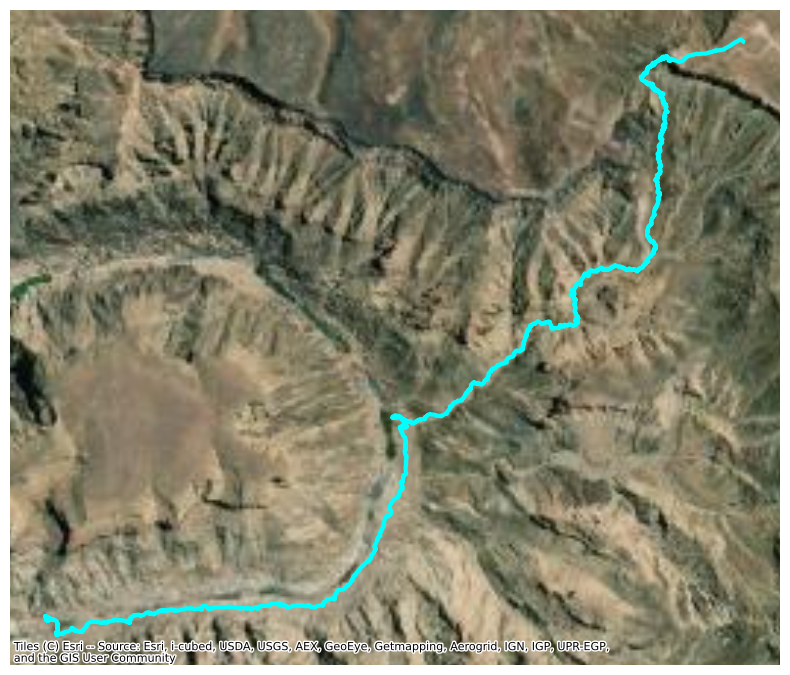

In [6]:
fig, ax = plt.subplots(figsize=(8, 10))  # 4:5 for Instagram

# Plot the hiking route
gdf_3857.plot(ax=ax, linewidth=3, color='cyan')  # Use a bright color for contrast

# Add high-detail satellite basemap
ctx.add_basemap(ax, source=ctx.providers.Esri.WorldImagery, zoom=14)  # You can increase zoom for tighter detail

# Clean up
ax.set_axis_off()
plt.tight_layout()
plt.show()


In [7]:
start_point = coords[0]
mid_point = coords[len(coords)//2]
end_point = coords[-1]


In [8]:
from pyproj import Transformer

# Convert to Web Mercator
transformer = Transformer.from_crs("EPSG:4326", "EPSG:3857", always_xy=True)
start_x, start_y = transformer.transform(*start_point)
mid_x, mid_y = transformer.transform(*mid_point)
end_x, end_y = transformer.transform(*end_point)


/var/folders/j5/16d1bkc931b1zc7vz3mn9rgw0000gn/T/ipykernel_68983/3658231441.py:69: UserWarning: Glyph 127937 (\N{CHEQUERED FLAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/j5/16d1bkc931b1zc7vz3mn9rgw0000gn/T/ipykernel_68983/3658231441.py:69: UserWarning: Glyph 9978 (\N{TENT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/j5/16d1bkc931b1zc7vz3mn9rgw0000gn/T/ipykernel_68983/3658231441.py:69: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/j5/16d1bkc931b1zc7vz3mn9rgw0000gn/T/ipykernel_68983/3658231441.py:72: UserWarning: Glyph 127937 (\N{CHEQUERED FLAG}) missing from font(s) DejaVu Sans.
  plt.savefig("fishriver_journal_map_instagram.png", bbox_inches='tight', pad_inches=0.2)
/var/folders/j5/16d1bkc931b1zc7vz3mn9rgw0000gn/T/ipykernel_68983/3658231441.py:72: UserWarning: Glyph 9978 (\N{TENT}) missing from font(s) DejaVu Sans.
  plt.savefig("fishriver_journal_map_instagram.png", bb

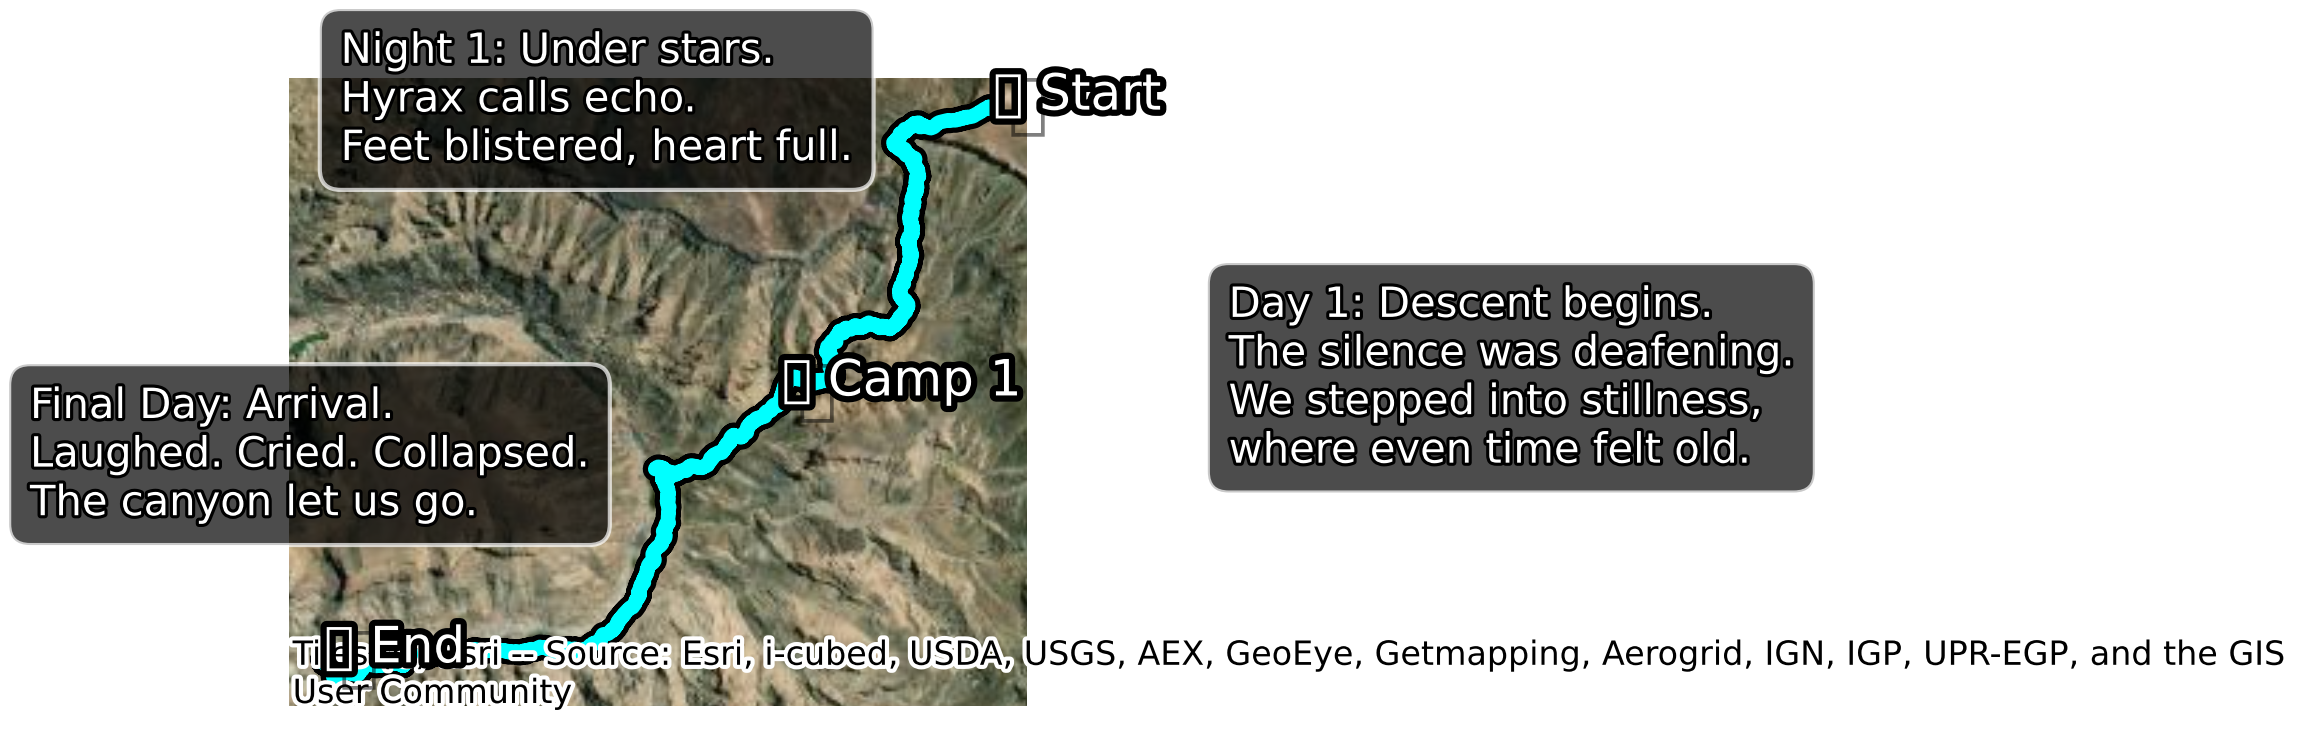

In [10]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
import geopandas as gpd
import contextily as ctx

# --- PREP ---

fig, ax = plt.subplots(figsize=(9, 11.25), dpi=300)  # 1080x1350 @ 120dpi or export with dpi=300

# --- ROUTE ---

gdf_3857.plot(ax=ax, linewidth=3.5, color='cyan', path_effects=[
    pe.withStroke(linewidth=6, foreground='black')  # glow effect
])

# --- BASEMAP ---

ctx.add_basemap(ax, source=ctx.providers.Esri.WorldImagery, zoom=14)

# --- LABEL STYLING ---

label_style = dict(
    fontsize=12,
    color='white',
    path_effects=[pe.withStroke(linewidth=3, foreground='black')]
)

journal_style = dict(
    fontsize=10,
    color='white',
    bbox=dict(boxstyle="round,pad=0.5", facecolor="black", alpha=0.7, edgecolor='white'),
    path_effects=[pe.withStroke(linewidth=1.5, foreground='black')]
)

# --- WAYPOINT MARKERS + EMOJI SHADOWS ---

def label_with_shadow(x, y, emoji, label):
    ax.text(x+50, y-50, emoji, fontsize=16, color='black', alpha=0.5)  # shadow
    ax.text(x, y, f"{emoji} {label}", **label_style)

label_with_shadow(start_x, start_y, "🏁", "Start")
label_with_shadow(mid_x, mid_y, "⛺", "Camp 1")
label_with_shadow(end_x, end_y, "🎯", "End")

# --- JOURNAL NOTES (at different sections of the trail) ---

ax.text(start_x + 800, start_y - 1200, "\n".join([
    "Day 1: Descent begins.",
    "The silence was deafening.",
    "We stepped into stillness,",
    "where even time felt old."
]), **journal_style)

ax.text(mid_x - 1500, mid_y + 800, "\n".join([
    "Night 1: Under stars.",
    "Hyrax calls echo.",
    "Feet blistered, heart full.",
]), **journal_style)

ax.text(end_x - 1000, end_y + 500, "\n".join([
    "Final Day: Arrival.",
    "Laughed. Cried. Collapsed.",
    "The canyon let us go.",
]), **journal_style)

# --- FINISHING TOUCHES ---

ax.set_axis_off()
plt.tight_layout()

# Save for Instagram
plt.savefig("fishriver_journal_map_instagram.png", bbox_inches='tight', pad_inches=0.2)
plt.show()


/var/folders/j5/16d1bkc931b1zc7vz3mn9rgw0000gn/T/ipykernel_68983/3854966872.py:64: UserWarning: Glyph 127937 (\N{CHEQUERED FLAG}) missing from font(s) DejaVu Sans.
  plt.savefig("fishriver_map_trimmed_clean.png", bbox_inches='tight', pad_inches=0)
/var/folders/j5/16d1bkc931b1zc7vz3mn9rgw0000gn/T/ipykernel_68983/3854966872.py:64: UserWarning: Glyph 9978 (\N{TENT}) missing from font(s) DejaVu Sans.
  plt.savefig("fishriver_map_trimmed_clean.png", bbox_inches='tight', pad_inches=0)
/var/folders/j5/16d1bkc931b1zc7vz3mn9rgw0000gn/T/ipykernel_68983/3854966872.py:64: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.savefig("fishriver_map_trimmed_clean.png", bbox_inches='tight', pad_inches=0)
/Users/jarushen/fishriver_env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127937 (\N{CHEQUERED FLAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jarushen/fishriver_env/lib/python3.12/site-packages

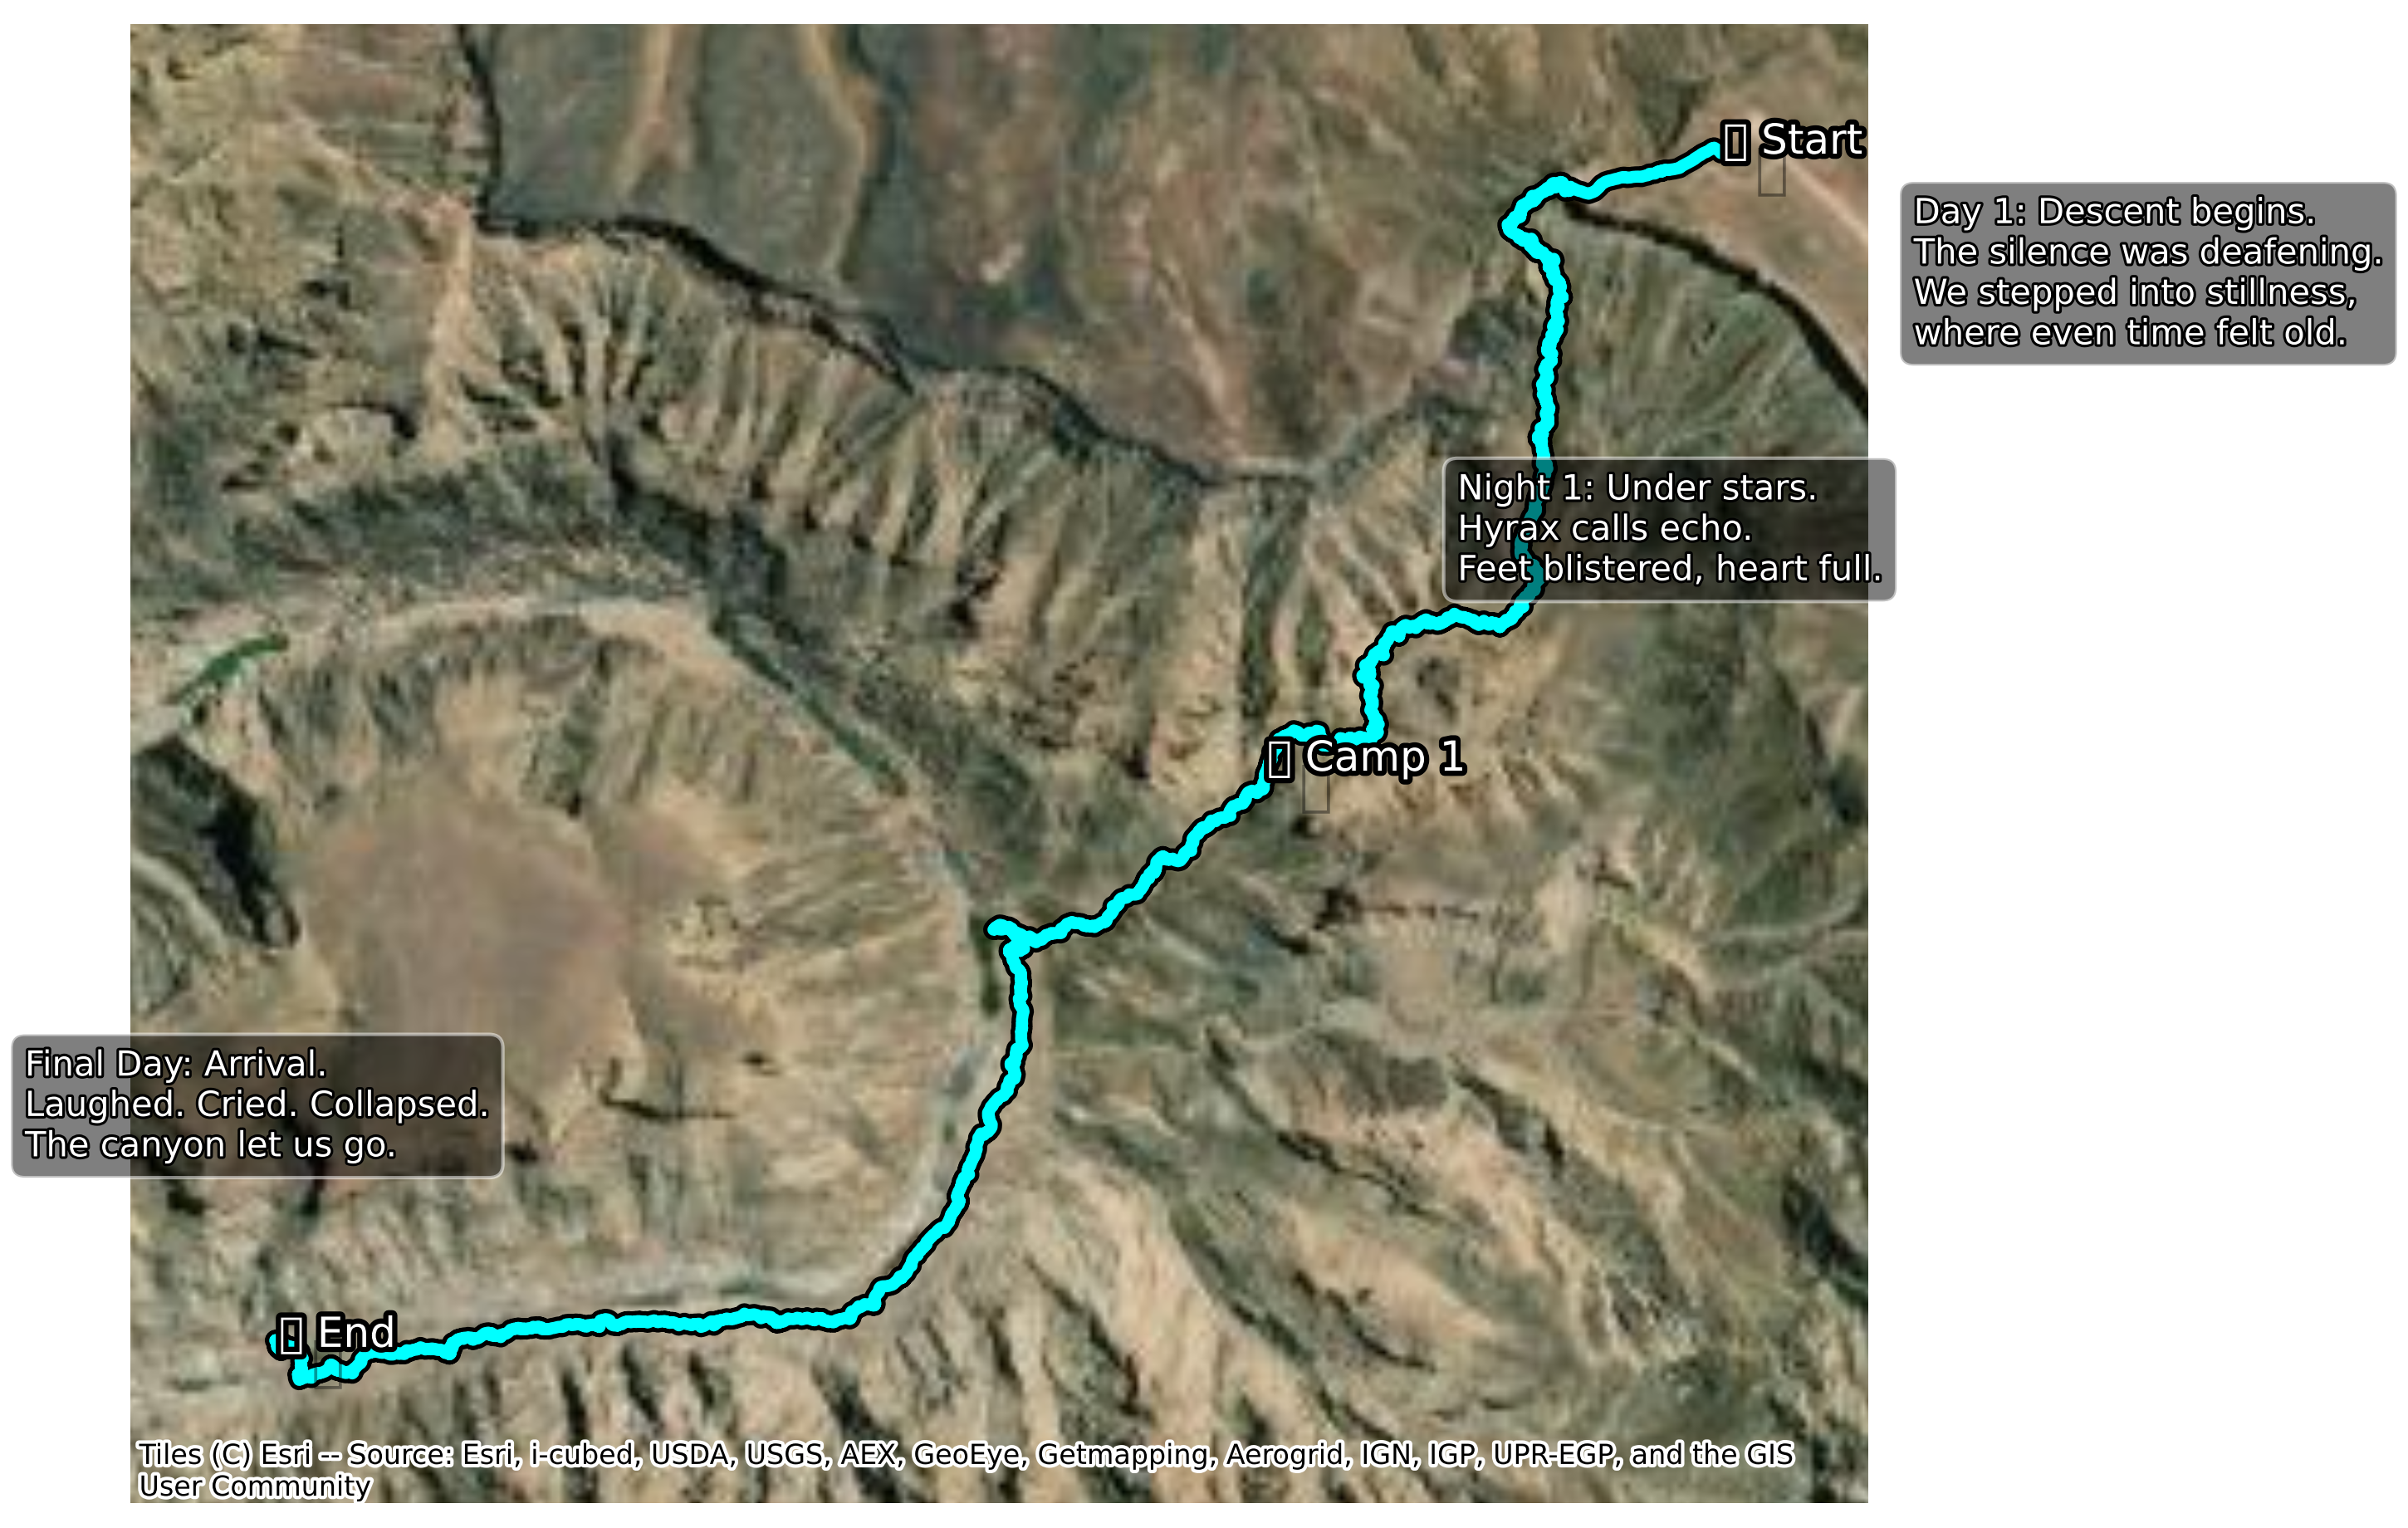

In [13]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
import contextily as ctx
import geopandas as gpd

fig, ax = plt.subplots(figsize=(9, 11.25), dpi=300)

# Plot route
gdf_3857.plot(ax=ax, linewidth=3.5, color='cyan',
              path_effects=[pe.withStroke(linewidth=6, foreground='black')])

# Add basemap
ctx.add_basemap(ax, source=ctx.providers.Esri.WorldImagery, zoom=14)

# Get route bounds
minx, miny, maxx, maxy = gdf_3857.total_bounds
padding_x = (maxx - minx) * 0.1
padding_y = (maxy - miny) * 0.1
ax.set_xlim(minx - padding_x, maxx + padding_x)
ax.set_ylim(miny - padding_y, maxy + padding_y)

# Text styles
label_style = dict(fontsize=12, color='white',
                   path_effects=[pe.withStroke(linewidth=3, foreground='black')])

journal_style = dict(fontsize=10, color='white',
                     bbox=dict(boxstyle="round,pad=0.4", facecolor="black", alpha=0.5, edgecolor='white'),
                     path_effects=[pe.withStroke(linewidth=1.5, foreground='black')])

# Waypoint marker function
def label_with_shadow(x, y, emoji, label):
    ax.text(x+50, y-50, emoji, fontsize=16, color='black', alpha=0.4)
    ax.text(x, y, f"{emoji} {label}", **label_style)

# Place start/mid/end markers
label_with_shadow(start_x, start_y, "🏁", "Start")
label_with_shadow(mid_x, mid_y, "⛺", "Camp 1")
label_with_shadow(end_x, end_y, "🎯", "End")

# Journal entries – repositioned near route
ax.text(start_x + 300, start_y - 300, "\n".join([
    "Day 1: Descent begins.",
    "The silence was deafening.",
    "We stepped into stillness,",
    "where even time felt old."
]), **journal_style)

ax.text(mid_x + 300, mid_y + 300, "\n".join([
    "Night 1: Under stars.",
    "Hyrax calls echo.",
    "Feet blistered, heart full."
]), **journal_style)

ax.text(end_x - 400, end_y + 300, "\n".join([
    "Final Day: Arrival.",
    "Laughed. Cried. Collapsed.",
    "The canyon let us go."
]), **journal_style)

# Hide axes
ax.set_axis_off()

# Export (everything now fits)
plt.savefig("fishriver_map_trimmed_clean.png", bbox_inches='tight', pad_inches=0)
plt.show()
